# Road Accident Severity Prediction - UK

# Introduction

The United Kingdom is comprised of four countries namely England, Wales, Scotland and Northern Ireland in Europe. The United Kingdom lies between latitudes 49° and 61° N, and longitudes 9° W and 2° E. The total area of the United Kingdom is approximately 244,820 square kilometres. The aim of this research is to visualize the different attributes in the road accident in the entire kingdom. At the end of the project, we will be able to build the machine learning model to predict the accident severity. at the end of the analysis, i believe, the people will be able to visualize the different attributes hidden in the accident and alert themselves.

# Data Collection

The data for this project is collect from https://data.gov.uk . here, all the informations related to road accident in thre united kingdom is found. the data is based on the police report,so, it will only contain the officially recorded road accidents. the available data contained various accident attributes like location, severity, weather condition, date, day of week, time, road surface conditions, number of casualities, etc. These information from the data is studied at first, some informations are dropped and important informations are used to visualize the attributes of the accident and then predict the accident severity. the data is available on csv format in the website.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [16]:
accident_df = pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Accidents_2018.csv')
accident_df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2018010080971,529150.0,182270.0,-0.139737,51.524587,1,3,2,2,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01000854
1,2018010080973,542020.0,184290.0,0.046471,51.539651,1,3,1,1,01/01/2018,...,0,0,4,1,1,0,0,1,1,E01003531
2,2018010080974,531720.0,182910.0,-0.102474,51.529746,1,3,2,1,01/01/2018,...,0,5,4,1,1,0,0,1,1,E01002723
3,2018010080981,541450.0,183220.0,0.037828,51.530179,1,2,2,1,01/01/2018,...,0,5,4,2,2,0,0,1,1,E01003492
4,2018010080982,543580.0,176500.0,0.065781,51.469258,1,2,2,2,01/01/2018,...,0,0,4,1,2,0,0,1,1,E01001682


In [17]:
casualities_df = pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Casualties_2018.csv')
casualities_df.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2018010080971,1,1,2,2,50,8,3,0,0,2,0,0,9,1,8
1,2018010080971,2,2,1,1,48,8,3,0,0,0,0,0,8,1,1
2,2018010080973,1,1,3,1,29,6,3,5,1,0,0,2,0,1,3
3,2018010080974,1,1,1,1,40,7,3,0,0,0,0,0,8,1,3
4,2018010080981,1,1,1,1,27,6,2,0,0,0,0,0,9,1,7


In [18]:
vehicle_df = pd.read_csv('http://data.dft.gov.uk/road-accidents-safety-data/dftRoadSafetyData_Vehicles_2018.csv')
vehicle_df.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010080971,1,9,0,18,0,0,0,0,0,...,6,1,32,6,1995,2,5,8,1,8
1,2018010080971,2,8,0,18,0,0,0,0,0,...,6,1,48,8,1798,8,6,1,1,1
2,2018010080973,1,9,0,18,0,2,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010080974,1,8,0,7,0,8,0,0,0,...,1,1,40,7,1797,8,6,3,1,3
4,2018010080974,2,9,0,18,0,1,0,0,3,...,6,1,21,5,-1,-1,-1,5,1,5


In [19]:
accident_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122635 entries, 0 to 122634
Data columns (total 32 columns):
Accident_Index                                 122635 non-null object
Location_Easting_OSGR                          122580 non-null float64
Location_Northing_OSGR                         122580 non-null float64
Longitude                                      122580 non-null float64
Latitude                                       122580 non-null float64
Police_Force                                   122635 non-null int64
Accident_Severity                              122635 non-null int64
Number_of_Vehicles                             122635 non-null int64
Number_of_Casualties                           122635 non-null int64
Date                                           122635 non-null object
Day_of_Week                                    122635 non-null int64
Time                                           122622 non-null object
Local_Authority_(District)                     122

In [20]:
casualities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160597 entries, 0 to 160596
Data columns (total 16 columns):
Accident_Index                        160597 non-null object
Vehicle_Reference                     160597 non-null int64
Casualty_Reference                    160597 non-null int64
Casualty_Class                        160597 non-null int64
Sex_of_Casualty                       160597 non-null int64
Age_of_Casualty                       160597 non-null int64
Age_Band_of_Casualty                  160597 non-null int64
Casualty_Severity                     160597 non-null int64
Pedestrian_Location                   160597 non-null int64
Pedestrian_Movement                   160597 non-null int64
Car_Passenger                         160597 non-null int64
Bus_or_Coach_Passenger                160597 non-null int64
Pedestrian_Road_Maintenance_Worker    160597 non-null int64
Casualty_Type                         160597 non-null int64
Casualty_Home_Area_Type               160597 non

In [21]:
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226409 entries, 0 to 226408
Data columns (total 23 columns):
Accident_Index                      226409 non-null object
Vehicle_Reference                   226409 non-null int64
Vehicle_Type                        226409 non-null int64
Towing_and_Articulation             226409 non-null int64
Vehicle_Manoeuvre                   226409 non-null int64
Vehicle_Location-Restricted_Lane    226409 non-null int64
Junction_Location                   226409 non-null int64
Skidding_and_Overturning            226409 non-null int64
Hit_Object_in_Carriageway           226409 non-null int64
Vehicle_Leaving_Carriageway         226409 non-null int64
Hit_Object_off_Carriageway          226409 non-null int64
1st_Point_of_Impact                 226409 non-null int64
Was_Vehicle_Left_Hand_Drive?        226409 non-null int64
Journey_Purpose_of_Driver           226409 non-null int64
Sex_of_Driver                       226409 non-null int64
Age_of_Driver     

In [22]:
df1=pd.merge(casualities_df,accident_df,on='Accident_Index')
df=pd.merge(df1,vehicle_df,on='Accident_Index')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270941 entries, 0 to 270940
Data columns (total 69 columns):
Accident_Index                                 270941 non-null object
Vehicle_Reference_x                            270941 non-null int64
Casualty_Reference                             270941 non-null int64
Casualty_Class                                 270941 non-null int64
Sex_of_Casualty                                270941 non-null int64
Age_of_Casualty                                270941 non-null int64
Age_Band_of_Casualty                           270941 non-null int64
Casualty_Severity                              270941 non-null int64
Pedestrian_Location                            270941 non-null int64
Pedestrian_Movement                            270941 non-null int64
Car_Passenger                                  270941 non-null int64
Bus_or_Coach_Passenger                         270941 non-null int64
Pedestrian_Road_Maintenance_Worker             270941 non-nu

In [23]:
df.head()

,Accident_Index,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010135259,1,1,1,2,18,4,3,0,0,...,6,2,18,4,1499,1,-1,8,2,8
1,2018010135259,1,1,1,2,18,4,3,0,0,...,6,3,-1,-1,1999,1,16,-1,-1,-1
2,2018010135261,1,1,3,2,30,6,3,10,9,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010135264,1,1,3,1,35,6,3,5,3,...,2,1,56,9,2967,2,1,1,1,1
4,2018010135268,1,1,2,2,73,10,3,0,0,...,6,1,78,11,1339,1,8,10,1,10


In [24]:
df.shape

(270941, 69)

In [25]:
df.isnull().sum()

Accident_Index                                     0
Vehicle_Reference_x                                0
Casualty_Reference                                 0
Casualty_Class                                     0
Sex_of_Casualty                                    0
Age_of_Casualty                                    0
Age_Band_of_Casualty                               0
Casualty_Severity                                  0
Pedestrian_Location                                0
Pedestrian_Movement                                0
Car_Passenger                                      0
Bus_or_Coach_Passenger                             0
Pedestrian_Road_Maintenance_Worker                 0
Casualty_Type                                      0
Casualty_Home_Area_Type                            0
Casualty_IMD_Decile                                0
Location_Easting_OSGR                            120
Location_Northing_OSGR                           120
Longitude                                     

In [26]:
df.drop('LSOA_of_Accident_Location',axis=1,inplace=True)
df.dropna(subset=['Location_Easting_OSGR','Location_Northing_OSGR', 'Longitude', 'Latitude'],axis=0,inplace=True)
df.dropna(subset=['Time'],axis=0,inplace=True)

In [27]:
df.isnull().values.any()

False

In [28]:
# display cleaned file
df.head()

,Accident_Index,Vehicle_Reference_x,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2018010135259,1,1,1,2,18,4,3,0,0,...,6,2,18,4,1499,1,-1,8,2,8
1,2018010135259,1,1,1,2,18,4,3,0,0,...,6,3,-1,-1,1999,1,16,-1,-1,-1
2,2018010135261,1,1,3,2,30,6,3,10,9,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1
3,2018010135264,1,1,3,1,35,6,3,5,3,...,2,1,56,9,2967,2,1,1,1,1
4,2018010135268,1,1,2,2,73,10,3,0,0,...,6,1,78,11,1339,1,8,10,1,10


In [29]:
df.shape

(270787, 68)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270787 entries, 0 to 270940
Data columns (total 68 columns):
Accident_Index                                 270787 non-null object
Vehicle_Reference_x                            270787 non-null int64
Casualty_Reference                             270787 non-null int64
Casualty_Class                                 270787 non-null int64
Sex_of_Casualty                                270787 non-null int64
Age_of_Casualty                                270787 non-null int64
Age_Band_of_Casualty                           270787 non-null int64
Casualty_Severity                              270787 non-null int64
Pedestrian_Location                            270787 non-null int64
Pedestrian_Movement                            270787 non-null int64
Car_Passenger                                  270787 non-null int64
Bus_or_Coach_Passenger                         270787 non-null int64
Pedestrian_Road_Maintenance_Worker             270787 non-nu

In [16]:
def month(string):
    return int(string[3:5])
df['Month']=df['Date'].apply(lambda x: month(x))

In [17]:
def hour(string):
    s=string[0:2]
    return int(s)
df['Hour']=df['Time'].apply(lambda x: hour(x))

In [18]:
df1=pd.DataFrame(data=df,columns=['Hour','Day_of_Week','Month','Accident_Severity'])
df1.head()

,Hour,Day_of_Week,Month,Accident_Severity
0,12,3,9,3
1,12,3,9,3
2,11,6,9,3
3,8,5,9,3
4,19,4,9,3


In [19]:
pd.DataFrame( {"count": df["Accident_Severity"].value_counts().values } , index = df["Accident_Severity"].value_counts().index )

,count
3,210795
2,54656
1,5336


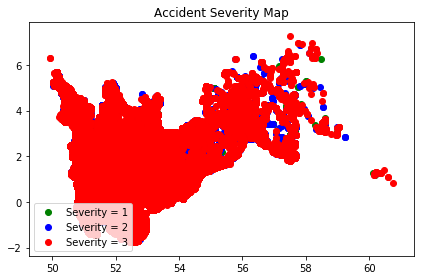

In [20]:
df1 = df.loc[df["Accident_Severity"] == 1]
df2 = df.loc[df["Accident_Severity"] == 2]
df3 = df.loc[df["Accident_Severity"] == 3]

xx1 , yy1 = df1["Latitude"] , -df1["Longitude"]
xx2 , yy2 = df2["Latitude"] , -df2["Longitude"]
xx3 , yy3 = df3["Latitude"] , -df3["Longitude"]

pts1 = plt.scatter(xx1,yy1,color = 'g' )
pts2 = plt.scatter(xx2,yy2,color = 'b' )
pts3 = plt.scatter(xx3,yy3,color = 'r' )
plt.legend((pts1, pts2, pts3), ('Severity = 1', 'Severity = 2', 'Severity = 3'),loc='lower left')
plt.title("Accident Severity Map")
plt.tight_layout()

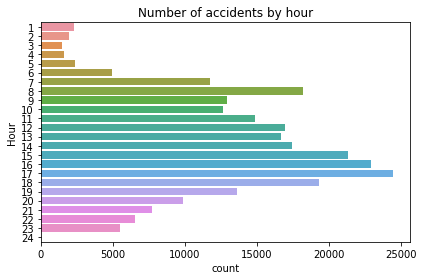

In [21]:
#classifiction , hour vs counts
sns.countplot(y = "Hour" , data = df , order = range(1,25))
plt.title("Number of accidents by hour")
plt.tight_layout()

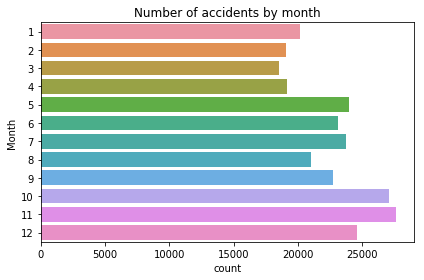

In [22]:
#classification , month vs count

sns.countplot(y = "Month" , data = df)
plt.title("Number of accidents by month")
plt.tight_layout()

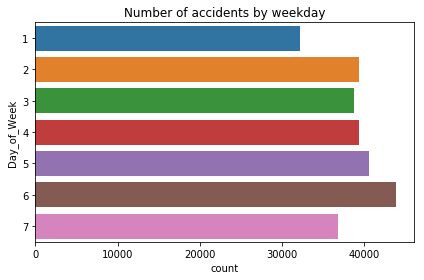

In [23]:
#classification , weekdays vs count

sns.countplot(y = "Day_of_Week" , data = df)
plt.title("Number of accidents by weekday")
plt.tight_layout()

In [24]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
date = df[['Accident_Index','Accident_Severity', 'Date']]
date.Date

0        2018-09-25
1        2018-09-25
2        2018-09-07
3        2018-09-27
4        2018-09-26
5        2018-09-26
6        2018-09-26
7        2018-09-26
8        2018-09-27
9        2018-09-27
10       2018-09-27
11       2018-09-26
12       2018-09-26
13       2018-09-27
14       2018-09-27
15       2018-09-27
16       2018-09-27
17       2018-09-16
18       2018-09-16
19       2018-09-27
20       2018-09-27
21       2018-09-27
22       2018-09-27
23       2018-09-27
24       2018-09-27
25       2018-09-27
26       2018-09-27
27       2018-09-27
28       2018-09-27
29       2018-09-27
            ...    
270911   2018-11-24
270912   2018-12-03
270913   2018-12-06
270914   2018-12-03
270915   2018-12-03
270916   2018-12-03
270917   2018-12-13
270918   2018-12-15
270919   2018-12-15
270920   2018-12-15
270921   2018-12-15
270922   2018-12-20
270923   2018-12-20
270924   2018-12-15
270925   2018-12-15
270926   2018-12-15
270927   2018-12-15
270928   2018-12-15
270929   2018-12-15


In [25]:
date['Month'] = df.Date.dt.month
low_sev = date[date['Accident_Severity']==1]
med_sev = date[date['Accident_Severity']==2]
high_sev = date[date['Accident_Severity']==3]

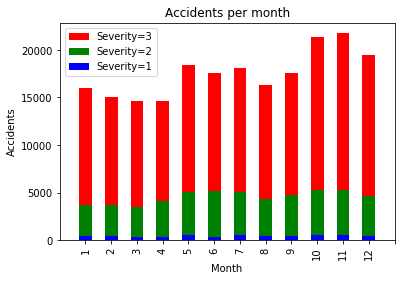

In [26]:
monthly = date[['Month', 'Accident_Index']].groupby(['Month']).count()


monthly['low_sev'] = low_sev[['Month', 'Accident_Index']].groupby(['Month']).count()
monthly['med_sev'] = med_sev[['Month', 'Accident_Index']].groupby(['Month']).count()
monthly['high_sev'] = high_sev[['Month', 'Accident_Index']].groupby(['Month']).count()
#monthly['Accident_Index'].plot.bar(figsize=(14,7), alpha=0.5, color='g', label='Total accidents')


monthly['high_sev'].plot.bar(color='r', label='Severity=3')
monthly['med_sev'].plot.bar(color='g', label='Severity=2')
monthly['low_sev'].plot.bar(color='b', label='Severity=1')

plt.title('Accidents per month')
plt.xticks(range(13))
plt.xlim(-1,12)
# plt.ylim(50000,85000)
plt.xlabel('Month')
plt.ylabel('Accidents')
plt.legend()

In [27]:
df2=pd.DataFrame(data=df,columns=['Accident_Severity','Light_Conditions','Weather_Conditions','Hour'])
df2.head()

,Accident_Severity,Light_Conditions,Weather_Conditions,Hour
0,3,1,1,12
1,3,1,1,12
2,3,1,1,11
3,3,1,1,8
4,3,4,1,19


In [28]:
#creating function to identify time of day: morning, afternoon, evening, night, etc.
def time_of_day(n):
    if n in range(4,8):
        return 'Early Morning'
    elif n in range(8,12):
        return 'Morning'
    elif n in range(12,17):
        return 'Afternoon'
    elif n in range(17,20):
        return 'Evening'
    elif n in range(20,25) or n==0:
        return 'Night'
    elif n in range(1,4):
        return 'Late Night'

In [29]:
df2['Time_of_Day']=df2['Hour'].apply(lambda x: time_of_day(x))
df2.head()

,Accident_Severity,Light_Conditions,Weather_Conditions,Hour,Time_of_Day
0,3,1,1,12,Afternoon
1,3,1,1,12,Afternoon
2,3,1,1,11,Morning
3,3,1,1,8,Morning
4,3,4,1,19,Evening


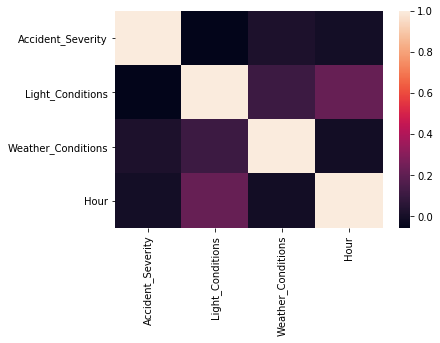

In [30]:
df2=df2[df2.Weather_Conditions!=-1]
sns.heatmap(df2.corr())

Text(0.5, 1.0, 'Weather vs Hour_of_Accident')

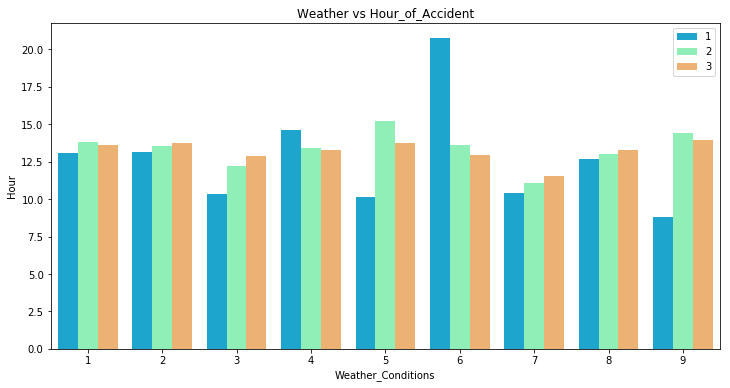

In [31]:
plt.figure(figsize=(12,6))
sns.barplot('Weather_Conditions','Hour',data=df2, hue='Accident_Severity',ci=None, palette='rainbow')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Weather vs Hour_of_Accident')

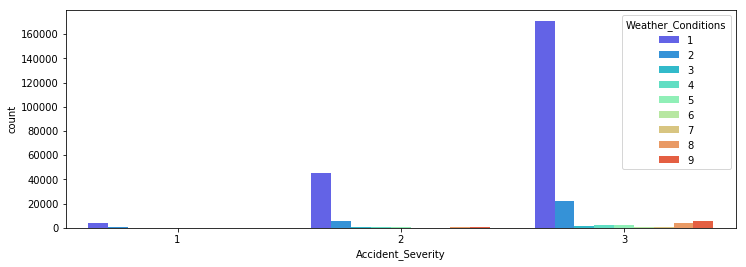

In [32]:
plt.figure(figsize=(12,4))
sns.countplot(x='Accident_Severity',data=df2,hue='Weather_Conditions',palette='rainbow')

In [33]:
df3=  pd.DataFrame(data=df, columns=['Journey_Purpose_of_Driver', 'Sex_of_Driver', 'Age_of_Driver','Age_Band_of_Driver','Driver_Home_Area_Type'])
df3=df3[df3.Sex_of_Driver !=-1]
df3.head()

,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type
0,6,2,18,4,2
1,6,3,-1,-1,-1
2,6,3,-1,-1,-1
3,2,1,56,9,1
4,6,1,78,11,1


In [34]:
map_df={1:'Journey as part of work',2:'Commuting to/from work',3:'Taking pupil to/from school',
        4:'Pupil riding to/from school',5:'Other',6:'Not known',15:'Not known/Other'}
map_df_age={1:'0 - 5',2:'6 - 10',3:'11 - 15',4:'16 - 20',5:'21 - 25',6:'26 - 35',7:'36 - 45',8:'46 - 55',9:'56 - 65',10:'66 - 75',11:'Over 75'}
map_df_area={1:'Urban Area',2:'Small Town',3:'Rural'}

df3.Age_Band_of_Driver=df3.Age_Band_of_Driver.map(map_df_age)
df3.Journey_Purpose_of_Driver=df3.Journey_Purpose_of_Driver.map(map_df)
df3.Driver_Home_Area_Type=df3.Driver_Home_Area_Type.map(map_df_area)
df3.head()

,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Driver_Home_Area_Type
0,Not known,2,18,16 - 20,Small Town
1,Not known,3,-1,NaN,NaN
2,Not known,3,-1,NaN,NaN
3,Commuting to/from work,1,56,56 - 65,Urban Area
4,Not known,1,78,Over 75,Urban Area


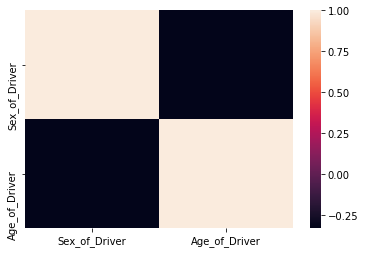

In [35]:
sns.heatmap(df3.corr())

Text(0.5, 1.0, 'Journey Purpose of Driver vs Age_of_Driver')

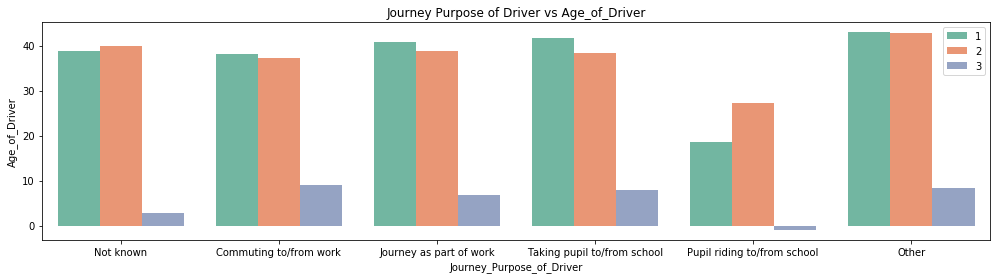

In [36]:
plt.figure(figsize=(17,4))
sns.barplot('Journey_Purpose_of_Driver','Age_of_Driver',hue='Sex_of_Driver',data=df3,ci=None, palette='Set2')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Journey Purpose of Driver vs Age_of_Driver')

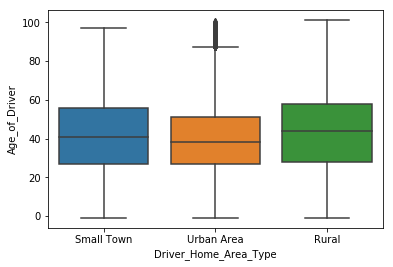

In [37]:
sns.boxplot('Driver_Home_Area_Type','Age_of_Driver',data=df3)

## Machine Learning

In [38]:
X = df[["Month" , "Hour" , "Day_of_Week" , "Longitude" , "Latitude" , "Age_of_Driver" , "Sex_of_Driver" , "Weather_Conditions" , "Light_Conditions"]]
y = df["Accident_Severity"]

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

#Evaluation Metrics
import time
from sklearn.metrics import accuracy_score, log_loss, jaccard_similarity_score, classification_report
from sklearn.metrics import precision_score, recall_score, roc_curve

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2) 

print('Size of training set:', X_train.shape[0],'\n'
      'Size of test set:',X_test.shape[0],'\n'
      'Size of evaluation set:', X_val.shape[0])

Size of training set: 173303 
Size of test set: 54158 
Size of evaluation set: 43326


In [42]:
t0=time.time()
tree = DecisionTreeClassifier(criterion='entropy', max_depth = 4)
tree.fit(X_train,y_train)
print('Time taken :' , time.time()-t0)
yhat = tree.predict(X_val)
score_tree = accuracy_score(y_val,yhat)
print('Accuracy :',score_tree)

Time taken : 0.5698060989379883
Accuracy : 0.7781239902137285


In [43]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
print('Time taken :' , time.time()-t0)
yhat = model_rf.predict(X_val)
score_rf = accuracy_score(y_val,yhat)
print('Accuracy :',score_rf)

Time taken : 41.35184359550476
Accuracy : 0.8875732816322762


In [44]:
importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model_rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Latitude,0.251
Longitude,0.249
Age_of_Driver,0.143
Hour,0.112
Month,0.103
Day_of_Week,0.082
Weather_Conditions,0.030
Light_Conditions,0.020
Sex_of_Driver,0.010


In [45]:
t0=time.time()
model_rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0, n_jobs=-1)
model_rf.fit(X_train,y_train)
t_rf = time.time()-t0
print('Time taken :' , t_rf)
yhat_rf = model_rf.predict(X_test)
jaccard_rf = jaccard_similarity_score(y_test,yhat_rf)
c_rf = classification_report(y_test,yhat_rf)
prec_rf = precision_score(y_test, yhat_rf, average='weighted')
rec_rf = recall_score(y_test, yhat_rf, average = 'weighted')
print('Jaccard :',jaccard_rf,'\n',
     c_rf)

Time taken : 41.347573041915894
Jaccard : 0.8863141179511799 
               precision    recall  f1-score   support

           1       0.99      0.64      0.78      1086
           2       0.96      0.49      0.65     10907
           3       0.88      0.99      0.93     42165

   micro avg       0.89      0.89      0.89     54158
   macro avg       0.94      0.71      0.79     54158
weighted avg       0.90      0.89      0.87     54158



In [46]:
acc=np.zeros(6)
i=0
for c in [0.5, 0.1, 0.01, 0.001, 10, 100]:
    lr = LogisticRegression(C=c, solver='liblinear').fit(X_train, y_train)
    yhat = lr.predict(X_val)
    acc[i] = accuracy_score(y_val,yhat)
    i+=1
acc

array([0.77812399, 0.77812399, 0.77812399, 0.77812399, 0.77812399,
       0.77812399])

In [47]:
t0=time.time()
lr = LogisticRegression(C=0.001, solver='liblinear').fit(X_train, y_train)
t_lr = time.time()-t0
print('Time taken :' , t_lr)
yhat = lr.predict(X_test)
jaccard_lr = jaccard_similarity_score(y_test,yhat)
c_lr = classification_report(y_test,yhat)
prec_lr = precision_score(y_test, yhat, average = 'weighted')
rec_lr = recall_score(y_test, yhat, average = 'weighted')
print('Jaccard :',jaccard_lr,'\n',
     c_lr)

Time taken : 3.5182900428771973
Jaccard : 0.7785553380848628 
               precision    recall  f1-score   support

           1       0.00      0.00      0.00      1086
           2       0.00      0.00      0.00     10907
           3       0.78      1.00      0.88     42165

   micro avg       0.78      0.78      0.78     54158
   macro avg       0.26      0.33      0.29     54158
weighted avg       0.61      0.78      0.68     54158



In [48]:
tt = X_train.shape[0]
tv = X_val.shape[0]
X_train[int(tt*0.5):].shape[0], X_val[int(tv*0.5):].shape[0]

(86652, 21663)

In [49]:
ks = 20
mean_acc = np.zeros(ks-1)
std_acc = np.zeros(ks-1)

for n in range(1,ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train[int(tt*0.5):],y_train[int(tt*0.5):])
    yhat = neigh.predict(X_val[int(tv*0.5):])
    mean_acc[n-1] = accuracy_score(y_val[int(tv*0.5):],yhat)
    std_acc[n-1] = np.std(yhat==y_val[int(tv*0.5):])/np.sqrt(yhat.shape[0])
print('Best performing K is '+ str(mean_acc.argmax()+1) + ' with an accuracy of ' +str(mean_acc.max()))

Best performing K is 19 with an accuracy of 0.7759774731108341


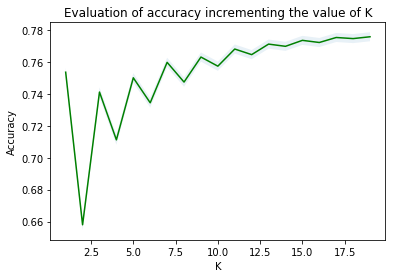

In [50]:
plt.plot(range(1,ks),mean_acc,'g')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Evaluation of accuracy incrementing the value of K')
plt.fill_between(range(1,ks),mean_acc-1*std_acc,mean_acc+1*std_acc, alpha=0.1)

In [51]:
t0=time.time()
model_knn = KNeighborsClassifier(n_neighbors = 19, n_jobs=-1)
model_knn.fit(X_train,y_train)
t_knn = time.time()-t0
print('Time taken :' , t_knn)
yhat = model_knn.predict(X_test)
jaccard_knn = jaccard_similarity_score(y_test,yhat)
c_knn = classification_report(y_test,yhat)
prec_knn = precision_score(y_test, yhat, average = 'weighted')
rec_knn = recall_score(y_test, yhat, average = 'weighted')
print('Jaccard :',jaccard_knn,'\n',
     c_knn)

Time taken : 3.630403995513916
Jaccard : 0.7768012112707264 
               precision    recall  f1-score   support

           1       0.46      0.04      0.08      1086
           2       0.45      0.07      0.12     10907
           3       0.79      0.98      0.87     42165

   micro avg       0.78      0.78      0.78     54158
   macro avg       0.57      0.36      0.36     54158
weighted avg       0.71      0.78      0.71     54158



In [52]:

print('Random Forest -','Jaccard:',jaccard_rf,'Precision:',prec_rf,'Recall:',rec_rf)
print('logistic Regression -', 'Jaccard:',jaccard_lr,'Precision:',prec_lr,'Recall:',rec_lr)
print('KNN -', 'Jaccard:',jaccard_knn,'Precision:',prec_knn,'Recall:',rec_knn)

Random Forest - Jaccard: 0.8863141179511799 Precision: 0.8955123569438413 Recall: 0.8863141179511799
logistic Regression - Jaccard: 0.7785553380848628 Precision: 0.606148414460435 Recall: 0.7785553380848628
KNN - Jaccard: 0.7768012112707264 Precision: 0.7143319549219929 Recall: 0.7768012112707264
